### Physics 77, Lecture 3: Functions, Loops

## Outline for Lecture 3.1
- Address questions
- Functions
- Conditionals
- Loops


# Recap: Week 3

- Composite structures: lists, tuples, dictionary, numpy arrays

## Feedback (thanks!)
* Recursive functions and conditionals (`elif` and the like): see below
* "When do we add a period after a number"


Period after a number specifies to Python that the number is to be treated as a `float` as opposed to an `int`. E.g.:

In [6]:
x = 5
print('x is of type',type(x))

y = 3.0/2
print('y is of type',type(y),'y=',y)

x = 5.5
print('x is of type',type(x))

x is of type <class 'int'>
y is of type <class 'float'> y= 1.5
x is of type <class 'float'>


Generally, Python assigns types based on context, and in the majority of the cases it will guess intent correctly. At the same time, you cannot (easily) specify the type when you declare a variable. When is it important to make the type explicit ? Three (possible) reasons:
1. You want to write portable code that could be used in another language (or another version of Python) -- in this case you do not want to rely on default behavior (which could be different in another language or version)
1. You want to reproduce behavior in other languages, especially with respect to roundoffs
1. You want to learn **best programming practices** so that you do not get shot in the foot in another language. 

C.f. examples in the terminal

## Functions

A function is a self-contained named piece of code that can be used by other parts of the code. Functions usually take arguments (parameters, variables), and return a value. Trig functions are a standard example. Most languages allow you to define your own functions. Functions can be group into a library, usually according to functionality they provide (e.g. math, complex numbers, linear algebra, plotting, etc).

In a way, Python functions can be viewed mathematical functions:

$f: \mathbb{X} \rightarrow \mathbb{Y}$

where $\mathbb{X}$ and $\mathbb{Y}$ can be whichever space of your choice.

Python has 3 classes of functions:
-  built-in functions, e.g. print()
-  functions from packages/modules, e.g. sin() from the math package
-  user-defined functions.

**Example 1: absolute value**

$\text{abs}: \mathbb{R} \rightarrow \mathbb{R}^+_0$

Mathematical implementation:

$x = \sqrt{x^2}$

In [7]:
x = -3
r = abs(x)   # Call the abs() function 
print(r)     # Call the print() function!

3


**Example 2: type casting**

In python one can convert variables from one type to the other using dedicated predefined functions. One example is the <font color=blue>float</font> function:

In [19]:
import numpy as np

a = 1.
b = float(a) # casting a float to a float. Actually quite useless
c = 2
d = float(c) # casting an integer to a float
#e = "np.sqrt(5.)"
e = "45."
ff = eval(e)
f = float(e) # casting a string to a float. Note: this is a special feature of Python ! 
print(a, type(a))
print(b, type(b))
print(c, type(c))
print(d, type(d))
print(e, type(e))
print('Eval of e = ',ff)
print(f, type(f))

1.0 <class 'float'>
1.0 <class 'float'>
2 <class 'int'>
2.0 <class 'float'>
45. <class 'str'>
Eval of e =  45.0
45.0 <class 'float'>


### User defined functions

If the function we need doesn't exist, we can create one. In order to do so, we need to provide:
- name of the function
-  a list of arguments
-  the algorithm of the function
-  the return value

The basic structure of a function is the following:

In [25]:
def MyFunction( x ):
    y = x*x            
    return y

retVal = MyFunction(3.)
print( 'retVal = ', retVal, ' and has type', type(retVal) ) 

retVal =  9.0  and has type <class 'float'>


In [26]:
y = MyFunction(173)
print(y)
print(173**2)

29929
29929


Notice:
-  the colon at the end of the function declaration
-  the indentation
-  the <font color=blue>return</font> command at the end of the function body

**Example: $\sin{(x)}/x$**

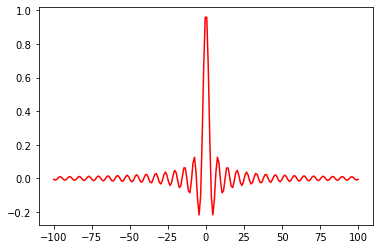

In [28]:
import matplotlib.pyplot as plt # we need this for drawing
import numpy as np              # for the sin and linspace function

def SinXoverX( x ):  # declaration
    y = np.sin(x)/x  # implementation. Question: is this safe ?!
    return y         # return

x = np.linspace( -100, 100., 200 ) # generate 200 points evenly distributed between 0.5 and 100.
y = SinXoverX(x)
# if a plot function doesn't show anything, run this and then the plot function again
%matplotlib inline
plt.plot( x, y, 'r-' )

In [29]:
print(SinXoverX(0.))

nan


<ipython-input-28-2859ccc05c19>:5: RuntimeWarning: invalid value encountered in double_scalars
  y = np.sin(x)/x  # implementation. Question: is this safe ?!


**Example: function with multiple arguments**

In [31]:
def distance( x, y ):
    return abs(x-y) # It's a very simple calculation, so I can implement it directly in the return statement

print( distance( 2., 4. ) )
print( distance( 2, 4 ) )

2.0
2


**Required and optional arguments**

Python functions can have two types of arguments: required and optional. Required arguments have no default value and must be passed by the user. Optional arguments have a default value which is used if not specified by the user.
For example, let's rewrite the <font color=blue>distance</font> function with the second argument as optional:

In [36]:
def distance( x, y=0. ):
    print('x=',x,'y=',y)
    return abs(x-y)

distance(7)
print( distance( 2., 4. ) )
print( distance( 1. ) )
print( distance(y=15,x=10) )  # you can supply explicit names to the arguments

x= 7 y= 0.0
x= 2.0 y= 4.0
2.0
x= 1.0 y= 0.0
1.0
x= 10 y= 15
5


**Function features to keep in mind**

-  Python allows also functions with no return value. Why? Sometimes a function is used to do things. e.g. if you want to compute the same quantity many times, and print it.
-  Functions can only be used after they are defined. It is good practice to define them at the beginning of a script.
-  You can put the function definitions in a separate file and import it. This is useful if you have some generic function that you use in many different programs.

In [43]:
import UserFunction as uf
print(uf.Gauss(1))

0.24197072451914337


## Conditionals

Conditionals are commands that are executed only if some condition is satisfied.
Beware! Indentation is important in Python. Note, that it doesn't really matter how broad the indentation is.


**Example: Heaviside step function**

All the functions we considered so far were well behaved. But how do we code a step function in Python?

$y = f(x) =
\begin{cases}
0 \quad \text{if}\quad x<0 \\
1 \quad \text{if}\quad x\geq0
\end{cases}
$

In [47]:
def Theta( x ):
    if x < 0.:
        print('In the negative branch')
        return 0.
    
    print('In the positive branch')
    return 1.

xraw = input('Enter numerical value: ') # Ask the user to privide a value
print(type(xraw))   # beware ! In Python 3 this returns a string, which needs to be converted to int or float type
x = eval(xraw)      # Also beware of potential security risks (buffer overflow)
print(x)
#print( Theta(float(xraw)) )
print( Theta(x))

Enter numerical value: np.exp(-11)
<class 'str'>
1.670170079024566e-05
In the positive branch
1.0


An important thing to take into account is the indentation!

In [53]:
x=-50
if x < 0 :
#    x = -x   # only executed for negative numbers
    if x < -100 : 
        print('Very small')
    print ('This was a negative value')
print (x)    # always executed

This was a negative value
-50


Sometimes you may want to do two different things:

In [60]:
xsum = 10
xraw = input('Enter numerical value: ')
x=float(xraw)
if x < 0 :
    xsum -= x
else :
    xsum += x
print (xsum)

Enter numerical value: 10
20.0


And sometimes you may need to have several branches

In [58]:
value = 0 # this line is not needed
x = float(input('Enter numerical value: '))
if x > 10 :
    value = -1
elif x > 7 : # else if
    value = 6
elif x > -1 :
    value = 1
else :
    value = 0
    
print (value)

Enter numerical value: 5
1


In [ ]:
## Loops

### While

The while loop repeats and execution while (as long as) a condition is valid.

In [62]:
sum = 0
count = 0
while sum < 99:
    sum += 10
    count += 1
    print (count,sum)
    
print ('final sum = ', sum, 'after ',count,'iterations')

1 10
2 20
3 30
4 40
5 50
6 60
7 70
8 80
9 90
10 100
final sum =  100 after  10 iterations


**Special keywords: break, continue, pass, else**

`break`:

In [63]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if count >= 6:
        print('About to exit the loop')
        break
    
print (sum, count)

About to exit the loop
60 6


`continue`:

In [65]:
sum = 0
count = 0
while sum < 10000:
    sum += 10
    count += 1
    if count > 4 :
        continue
    print (sum)
    
print (sum, count)

10
20
30
40
10000 1000


`else`:

In [67]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if count >= 6:
        print('break')
        break
else:                                     # beware of indentation !!!
    print ("Finished without break")
    
    
print (sum, count)

break
60 6


Beware of infinite loops ! 

In [69]:
sum = 0
count = 0
while sum < 100:
#    sum -= 10       # typo ! 
    sum += 10       # fixed typo ! 
    count += 1
    if count % 10000 == 0:
        print(sum)
    
print (sum, count)

100 10


## For

The for loop is more conventional and repeats the execution for an index within a given range. This is similar to for() loop in C or other languages.

An equivalent syntax in C would be for(int i=0;i<10;i++) {}

In [70]:
list = range(0,10)
print(list)
print (len(list))

range(0, 10)
10


In [71]:
for i in list:    # loop from 0 to 10, not including 10, with step = 1
    print (i, i*2)

0 0
1 2
2 4
3 6
4 8
5 10
6 12
7 14
8 16
9 18


In [72]:
for i in range(0,10,2):   # loop from 0 to 10, not including 10, with step = 2
    print (i)

0
2
4
6
8


In [75]:
list = [1,2,3,4,7,111.,67.] # iterate over elements of the tuple or list
list.append(12)          # what happens here ? 
for x in list:
    print (x**2)

1
4
9
16
49
12321.0
4489.0
144


You can iterate over lists produced by other functions, e.g. a list of keys to a dictionary 

In [79]:
lastnames = {}                        # create a dictionary
lastnames['Billy'] = 'Jones'
lastnames['Johnny'] = 'Jones'
lastnames['Johnny'] = 'Baker'
lastnames['Heather'] = 'Gray'
#lastnames[5] = 'Foo'

#print(lastnames['Yury'])
lastnames['Yury'] = 'Kolomensky'

list = sorted(lastnames.keys(),reverse=True)
#print (list)
for key in lastnames.keys():          # iterate over elements of the dictionary
    print (key, lastnames[key])

for key in list:          # iterate over elements of the dictionary
    print (key, lastnames[key])


Billy Jones
Johnny Baker
Heather Gray
Yury Kolomensky
Yury Kolomensky
Johnny Baker
Heather Gray
Billy Jones



### Nesting and recursive functions

We have seen already a few examples of an if statement inside a while loop: this called nesting. Python sets no limit to nesting, i.e. you can have infinite statements and loops within each other.

In [80]:
def factorial(n):                # definition of the function
    value = 1
    for i in range(2,n+1):       # loop
        value *= i               # increment factorial 
        
    return value                 # return value

print ('factorial(10)=',factorial(10))
for i in range(1,5):
    print ('factorial(%d)=%2d' % (i,factorial(i)))

#print(factorial(1.1))

factorial(10)= 3628800
factorial(1)= 1
factorial(2)= 2
factorial(3)= 6
factorial(4)=24


Here is a more elegant way to implement the function (recursive). It also has basic error handling

In [88]:
import numpy as np
def factRecursive(n):
    if n > 1:
        return n*factRecursive(n-1)
    
    return 1

print (factRecursive(2))

2


In [81]:
import numpy as np
def factRecursiveSafe(n):
    '''Computes n!, input: integer, output: integer'''
    if type(n)!=int:                     # these factorials defined only for integers
        return np.nan                    # return Not-a-number
    if n > 1:
        return n*factRecursiveSafe(n-1)      # THIS IS THE RECURSION!!
    elif n >= 0:
        return 1
    else:
        return -np.inf                 # return negative infinit
    
print (factRecursiveSafe(10))
print (factRecursiveSafe(-1))
print (factRecursiveSafe('Joe'))

x = factorial(5)   # old function still defined
y = x**2
print (y)

3628800
-inf
nan
14400
